**Loading Libraries and Data**

In [317]:
import re # for regular expressions
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
file = open('C:\\Users\\hp 840\\Desktop\\nlp\\part1.txt',encoding='utf-8')
ch = file.readlines()

In [318]:
ids = []
labels = []
tweet = []
j=1
cmpt_id = 1 
while(j < len(ch)) :
    
    i = ch[j].startswith('<!--##')
    if i == True : 
        print(ch[j])
        j+=1
    
    ch[j] = ch[j][:-1].replace('"',"")
    label = re.search('\d+',ch[j+1])
   
    if (int(label[0]) == 0) or  (int(label[0]) == 1):
        c = ch[j][:-1].replace('\n','')
        c = c.replace('\t',' ')
        tweet.append(ch[j][:-1])
        labels.append(int(label[0]))
        ids.append(cmpt_id)
        cmpt_id += 1
    
    
    j+=2

<!--############## كورونا #################-->

<!--############## الغا_الاختبارات_مطلب #################-->

<!--############## مجموعه_العشرين_في_السعوديه #################-->



In [319]:
data = {'id':ids , 'label' : labels ,'tweet' : tweet}
dataset = pd.DataFrame(data=data)
dataset.head(-5)

,id,label,tweet
0,1,1,من ايجابيات الوضع الحالي التي نتمنى ان تستمر ب...
1,2,1,اقعد من النوم اكل العب سوني اكل اشوف فلم اكل ا...
2,3,0,حسبي الله ونعم الوكيل الله لايوفقكم بسسس يعني ...
3,4,1,مع #حضر_التجول ،و #الحجر_الصحي ،أحكولنا كيفاش ...
4,5,1,المافيا الإيطالية تتبرع للحكومة 7 مليارات لموا...
...,...,...,...
6339,6340,1,#مجموعه_العشرين_في_السعوديه أعظم و أعلى الثقة ...
6340,6341,1,الامم العظيمة تقود العالم للسلام .. البيان الخ...
6341,6342,1,#الحل_في_الرياض #الملك_سلمان_بن_عبدالعزيز_آل_س...
6342,6343,1,قمة افتراضية لواقع ينعم فيه الجميع بالرخاء وال...


In [320]:
file = open('C:\\Users\\hp 840\\Desktop\\nlp\\part2.txt',encoding='utf-8')
ch = file.readlines()

In [321]:
labels = []
tweets = []
ids = []
for j in range(len(ch)):
    label = ch[j].split(',')[0]
    tweet  = ch[j].split(',')[1]
    
    tweet = tweet.replace('\n','')
    tweet = tweet.replace('\t',' ')
    labels.append(int(label))
    tweets.append(tweet)
    ids.append(cmpt_id)
    
    cmpt_id += 1
    
data = {'id':ids , 'label' : labels ,'tweet' : tweets}

In [322]:
df2 = pd.DataFrame(data=data)
df2.head(-5)

,id,label,tweet
0,6350,0,توقعت اذا جات داريا بشوفهم كاملين بس لي للحي...
1,6351,0,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال...
2,6352,0,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين...
3,6353,0,الدودو جايه تكمل علي 💔
4,6354,0,أحببته حتى أقنعنى إن ما فات من العمر كان إنت...
...,...,...,...
6989,13339,1,مفروض تجربي عشان تقدري تحكمي صح ليس من رأى كم...
6990,13340,1,ابو عمر فوق اي رياضي سعودي 💚
6991,13341,1,صوره تمثل مشاعر كل الهلاليين تجاه مايقدمه الح...
6992,13342,1,أغلبنا ينظرون للأشياء من منظور واحد ولا نراها...


In [323]:
dataset = dataset.append(df2,ignore_index=True)
dataset.head(-5)

,id,label,tweet
0,1,1,من ايجابيات الوضع الحالي التي نتمنى ان تستمر ب...
1,2,1,اقعد من النوم اكل العب سوني اكل اشوف فلم اكل ا...
2,3,0,حسبي الله ونعم الوكيل الله لايوفقكم بسسس يعني ...
3,4,1,مع #حضر_التجول ،و #الحجر_الصحي ،أحكولنا كيفاش ...
4,5,1,المافيا الإيطالية تتبرع للحكومة 7 مليارات لموا...
...,...,...,...
13338,13339,1,مفروض تجربي عشان تقدري تحكمي صح ليس من رأى كم...
13339,13340,1,ابو عمر فوق اي رياضي سعودي 💚
13340,13341,1,صوره تمثل مشاعر كل الهلاليين تجاه مايقدمه الح...
13341,13342,1,أغلبنا ينظرون للأشياء من منظور واحد ولا نراها...


In [324]:

dataset = dataset.sample(frac=1).reset_index(drop=True)

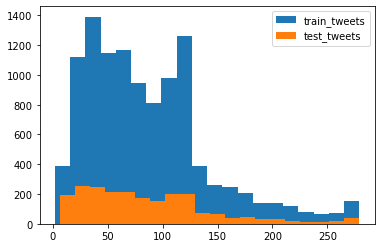

In [325]:
length_train = dataset['tweet'][:11100].str.len()
length_test = dataset['tweet'][11100:].str.len()
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

**Data Cleaning**

In [326]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

**1. Removing Twitter Handles (@user)**

In [327]:
dataset['tidy_tweet'] = np.vectorize(remove_pattern)(dataset['tweet'], "'@.+'*") 
dataset.head(-5)

,id,label,tweet,tidy_tweet
0,2424,0,وربي كل من يتبعهم يصاب ب #كورون,وربي كل من يتبعهم يصاب ب #كورون
1,4725,0,#الغا_الاختبارات_مطلب معليش بس ايش الوضع هذا ي...,#الغا_الاختبارات_مطلب معليش بس ايش الوضع هذا ي...
2,5629,1,في الأزمات يتضح صديقك من عدوك . لا توجد في الس...,في الأزمات يتضح صديقك من عدوك . لا توجد في الس...
3,5678,1,تستحق مملكتنا الحبيبة كل نجاح ومجد، فهي مهد ال...,تستحق مملكتنا الحبيبة كل نجاح ومجد، فهي مهد ال...
4,8375,0,في مسابقة لتوقعات nba 🤔,في مسابقة لتوقعات nba 🤔
...,...,...,...,...
13338,11986,0,كثير من البشر ليسو مخلصين بل هم مخلصين ل إحت...,كثير من البشر ليسو مخلصين بل هم مخلصين ل إحت...
13339,9518,0,وين سعوديتنا اللي نعرفها؟ 😳,وين سعوديتنا اللي نعرفها؟ 😳
13340,9839,0,هى دى اخلاقهم للأسف 😔,هى دى اخلاقهم للأسف 😔
13341,3207,0,ندعوا #الله أن يدمركم ب #كورونا وغيرها كما احت...,ندعوا #الله أن يدمركم ب #كورونا وغيرها كما احت...


**2. Removing Punctuations, Numbers, and Special Characters**

In [328]:
def split(word): 
    return [char for char in word]  

lis_alph = 'إغأظضذخثتشرقصفعسنملكيطحآزوهدجابىؤءئ#'
lis_alph = split(lis_alph)


In [329]:
def deEmojify(text):
    weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weridPatterns.sub(r'',text)

In [330]:
import emoji
import regex

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [331]:


tidy_tweet = np.array(dataset['tidy_tweet'])

new_tidy = []
for t in tidy_tweet :
   
    t1 = t
    
    
   
    
    
    
    string_without_ponc = []
    
        
    t1 = re.sub('[:!,*)"%(&$?^؟]', '',t1)
    t1 = t1.replace('.','')
    t1 = re.sub('[\']', '',t1)
    t1c = re.sub('[0-9]', '',t1)
    
    
    
    emojis = split_count(t1)
    
    for em in emojis : 
        t1 = re.sub(em,'',t1)
        
    t1 = deEmojify(t1)
    
    lis = t1.split(' ')
    
    for j in range(len(lis)):
        for alph in lis_alph:
            if lis[j].startswith(alph): 
                string_without_ponc.append(lis[j])
                break
                
                
    string_without_ponc = ' '.join(string_without_ponc)
                
   
    
    
    
    
    
    new_tidy.append(string_without_ponc)
    
dataset['tidy_tweet'] = new_tidy
dataset.head(-5)

,id,label,tweet,tidy_tweet
0,2424,0,وربي كل من يتبعهم يصاب ب #كورون,وربي كل من يتبعهم يصاب ب #كورون
1,4725,0,#الغا_الاختبارات_مطلب معليش بس ايش الوضع هذا ي...,#الغا_الاختبارات_مطلب معليش بس ايش الوضع هذا ي...
2,5629,1,في الأزمات يتضح صديقك من عدوك . لا توجد في الس...,في الأزمات يتضح صديقك من عدوك لا توجد في السيا...
3,5678,1,تستحق مملكتنا الحبيبة كل نجاح ومجد، فهي مهد ال...,تستحق مملكتنا الحبيبة كل نجاح ومجد، فهي مهد ال...
4,8375,0,في مسابقة لتوقعات nba 🤔,في مسابقة لتوقعات
...,...,...,...,...
13338,11986,0,كثير من البشر ليسو مخلصين بل هم مخلصين ل إحت...,كثير من البشر ليسو مخلصين بل هم مخلصين ل إحتيا...
13339,9518,0,وين سعوديتنا اللي نعرفها؟ 😳,وين سعوديتنا اللي نعرفها
13340,9839,0,هى دى اخلاقهم للأسف 😔,هى دى اخلاقهم للأسف
13341,3207,0,ندعوا #الله أن يدمركم ب #كورونا وغيرها كما احت...,ندعوا #الله أن يدمركم ب #كورونا وغيرها كما احت...


In [332]:
dataset.to_csv('C:\\Users\\hp 840\\Desktop\\nlp\\par.csv')

In [333]:
dataset.head(-5)

,id,label,tweet,tidy_tweet
0,2424,0,وربي كل من يتبعهم يصاب ب #كورون,وربي كل من يتبعهم يصاب ب #كورون
1,4725,0,#الغا_الاختبارات_مطلب معليش بس ايش الوضع هذا ي...,#الغا_الاختبارات_مطلب معليش بس ايش الوضع هذا ي...
2,5629,1,في الأزمات يتضح صديقك من عدوك . لا توجد في الس...,في الأزمات يتضح صديقك من عدوك لا توجد في السيا...
3,5678,1,تستحق مملكتنا الحبيبة كل نجاح ومجد، فهي مهد ال...,تستحق مملكتنا الحبيبة كل نجاح ومجد، فهي مهد ال...
4,8375,0,في مسابقة لتوقعات nba 🤔,في مسابقة لتوقعات
...,...,...,...,...
13338,11986,0,كثير من البشر ليسو مخلصين بل هم مخلصين ل إحت...,كثير من البشر ليسو مخلصين بل هم مخلصين ل إحتيا...
13339,9518,0,وين سعوديتنا اللي نعرفها؟ 😳,وين سعوديتنا اللي نعرفها
13340,9839,0,هى دى اخلاقهم للأسف 😔,هى دى اخلاقهم للأسف
13341,3207,0,ندعوا #الله أن يدمركم ب #كورونا وغيرها كما احت...,ندعوا #الله أن يدمركم ب #كورونا وغيرها كما احت...


**4. Text Normalization**

In [334]:
tokenized_tweet = dataset['tidy_tweet'].apply(lambda x: x.split())

In [335]:
tokenized_tweet.head()[0]

['وربي', 'كل', 'من', 'يتبعهم', 'يصاب', 'ب', '#كورون']

In [336]:
import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

**A) Understanding the common words used in the tweets: WordCloud**

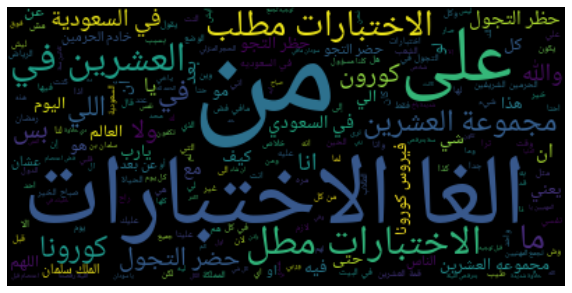

In [337]:
all_words = ' '.join([text for text in dataset['tidy_tweet']])
all_words = all_words.replace('_',' ')
text = arabic_reshaper.reshape(all_words)
text = get_display(text)

from wordcloud import WordCloud
wordcloud = WordCloud(font_path='C:\\Users\\hp 840\\Desktop\\nlp\\NotoNaskhArabic-Regular.ttf').generate(text)
wordcloud.to_file("C:\\Users\\hp 840\\Desktop\\nlp\\worCloud.png")
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**B) Words in non racist/sexist tweets**

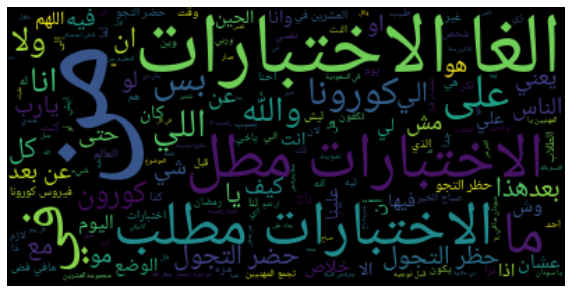

In [338]:
all_words =' '.join([text for text in dataset['tidy_tweet'][dataset['label'] == 0]])

all_words = all_words.replace('_',' ')
text = arabic_reshaper.reshape(all_words)
text = get_display(text)

from wordcloud import WordCloud
wordcloud = WordCloud(font_path='C:\\Users\\hp 840\\Desktop\\nlp\\NotoNaskhArabic-Regular.ttf').generate(text)
wordcloud.to_file("C:\\Users\\hp 840\\Desktop\\nlp\\worCloud.png")
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**C) Racist/Sexist Tweets**

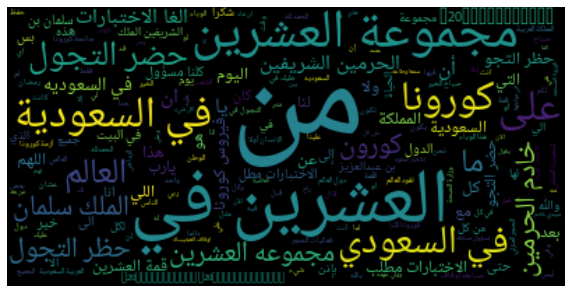

In [339]:
all_words =' '.join([text for text in dataset['tidy_tweet'][dataset['label'] == 1]])

all_words = all_words.replace('_',' ')
text = arabic_reshaper.reshape(all_words)
text = get_display(text)

from wordcloud import WordCloud
wordcloud = WordCloud(font_path='C:\\Users\\hp 840\\Desktop\\nlp\\NotoNaskhArabic-Regular.ttf').generate(text)
wordcloud.to_file("C:\\Users\\hp 840\\Desktop\\nlp\\worCloud.png")
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment**

In [340]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = []
        ch = i.split(' ')
        for k in range(len(ch)):
            if ch[k].startswith('#'):
                ht.append(ch[k])
    
        hashtags.append(ht)
        
    return hashtags


In [341]:
dataset.to_csv('C:\\Users\\hp 840\\Desktop\\nlp\\par.csv')

In [342]:
HT_regular = hashtag_extract(np.array(dataset['tidy_tweet'][dataset['label'] == 0]))

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(np.array(dataset['tidy_tweet'][dataset['label'] == 1]))

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

**Non-Racist/Sexist Tweets**

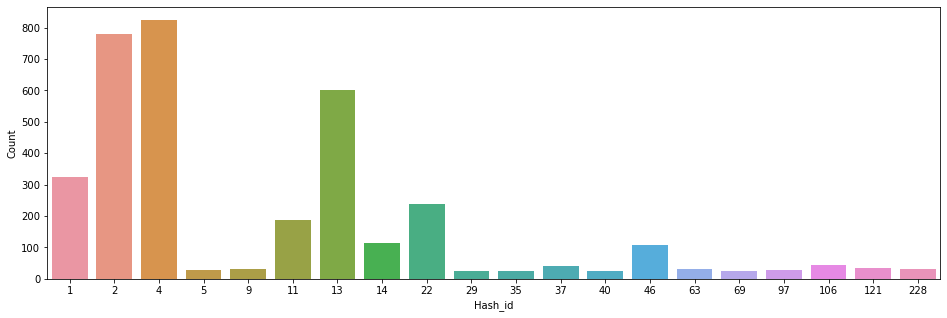

In [343]:
import nltk
import seaborn as sns
a = nltk.FreqDist(HT_regular)
has_id = []
for j in range(len(list(a.keys()))):
    has_id.append(j+1)
    
d = pd.DataFrame({'Hash_id':has_id,'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
d.head(-5)
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hash_id", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [344]:
d.loc[d['Hash_id'] == 2]

,Hash_id,Hashtag,Count
1,2,#الغا_الاختبارات_مطلب,780


**Racist/Sexist Tweets**

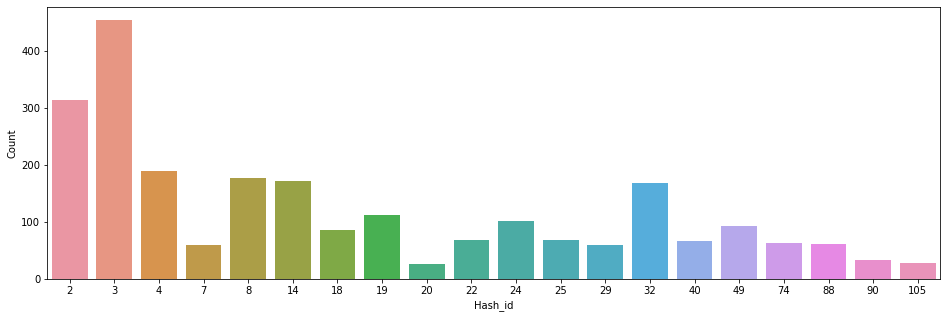

In [345]:
import nltk
import seaborn as sns
a = nltk.FreqDist(HT_negative)
has_id = []
for j in range(len(list(a.keys()))):
    has_id.append(j+1)
    
d = pd.DataFrame({'Hash_id':has_id,'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
d.head(-5)
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hash_id", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [346]:
d.loc[d['Hash_id'] == 8]

,Hash_id,Hashtag,Count
7,8,#مجموعة_العشرين_في_السعودي,177


**Extracting Features from Cleaned Tweets**

In [347]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

**Bag-of-Words Features**

In [348]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(dataset['tidy_tweet'])
bow.shape

(13348, 1000)

**TF-IDF Features**

In [349]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(dataset['tidy_tweet'])
tfidf.shape

(13348, 1000)

**Word Embeddings**

**1. Word2Vec Embeddings**

In [350]:
tokenized_tweet = dataset['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(dataset['tidy_tweet']), epochs=20)

(2794546, 3650280)

In [351]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [352]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(13348, 200)

**2. Doc2Vec Embedding**

In [353]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [354]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [355]:
labeled_tweets = add_label(tokenized_tweet)

In [356]:
labeled_tweets[:6]

[LabeledSentence(words=['وربي', 'كل', 'من', 'يتبعهم', 'يصاب', 'ب', '#كورون'], tags=['tweet_0']),
 LabeledSentence(words=['#الغا_الاختبارات_مطلب', 'معليش', 'بس', 'ايش', 'الوضع', 'هذا', 'يعني', 'احنا', 'بترتفع', 'نسبه', 'الرسوب', 'عندنا', 'لان', 'اغلب', 'المنهج', 'م', 'درسناه', 'هذا', 'يعتبر', 'ظلم', 'وكمان', 'لسا', 'صاملين', 'ع', 'ان', 'الاختبارات', 'برمضان'], tags=['tweet_1']),
 LabeledSentence(words=['في', 'الأزمات', 'يتضح', 'صديقك', 'من', 'عدوك', 'لا', 'توجد', 'في', 'السياسة', 'عدو', 'ولا', 'صديق', 'دائم', 'الا', 'ان', 'هذه', 'الأزمة', 'ستغير', 'العالم', 'وسنشهد', 'رخاء', 'شعوب', 'الهند', 'وتعاسة', 'شعوب', 'أوروبا', 'والأمثلة', 'كثيرة', 'لكلا', 'الطرفين', 'حفظ', 'الله', 'مليكنا', 'وولي', 'عهده', 'الأمين', 'لارض', 'الحرمين', 'و', 'الشعب', 'السعودي', 'الباسل##مجموعة_العشرين_في_السعودي'], tags=['tweet_2']),
 LabeledSentence(words=['تستحق', 'مملكتنا', 'الحبيبة', 'كل', 'نجاح', 'ومجد،', 'فهي', 'مهد', 'الرسالة،', 'ومنطلق', 'النور،', 'وها', 'هي', 'الآن', 'تُحقّق', 'الانجاز', 'تلو', 'الانجاز،

In [357]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|███████████████████████████████████████████████████████████████████████| 13348/13348 [00:00<00:00, 1374115.06it/s]


In [358]:
model_d2v.train(labeled_tweets, total_examples= len(dataset['tidy_tweet']), epochs=15)

**Preparing doc2vec Feature Set**

In [359]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(dataset)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)

**Model Building**

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

    1-Logistic Regression
    2-Support Vector Machine
    3-RandomForest
    4-XGBoost


**1. Logistic Regression**

In [360]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

**Bag-of-Words Features**

In [361]:
train_bow = bow[:11000,:]
test_bow = bow[11000:,:]

labels = dataset['label'][:11000]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, labels,  
                                                          random_state=42, 
                                                          test_size=0.3)

In [362]:
ytrain.unique()

array([0, 1], dtype=int64)

In [363]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0

prediction_int = prediction_int.astype(np.int)



In [364]:
test = pd.DataFrame()
test['id'] = dataset['id'][11000:]
test['tweet'] = dataset['tweet'][11000:]
test['tidy_tweet'] = dataset['tidy_tweet'][11000:]

test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False)

In [365]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score , precision_score
acc(yvalid, prediction_int) , recall_score(yvalid, prediction_int) , precision_score(yvalid, prediction_int)

(0.8266666666666667, 0.6302083333333334, 0.6269430051813472)

In [366]:
f1_score(yvalid, prediction_int)

0.6285714285714286

**TF-IDF Features**

In [367]:
train_tfidf = tfidf[:11000,:]
test_tfidf = tfidf[11000:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [368]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.6219667943805876

In [369]:
acc(yvalid, prediction_int)

0.8206060606060606

In [370]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6151685393258427

In [371]:
train_tfidf = tfidf[:11000,:]
test_tfidf = tfidf[11000:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [372]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.6219667943805876

**Word2Vec Features**

In [373]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [374]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6041412911084043

**Doc2Vec Features**

In [375]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [376]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5414507772020725

**2. Support Vector Machine¶**

**Bag-of-Words Features**

In [377]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6152768044849335

In [378]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svc_bow.csv', index=False)

**TF-IDF Features**

In [379]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.615819209039548

**Word2Vec Features**

In [380]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)


0.6025974025974026

**Doc2Vec Features**

In [381]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5520483546004029

**3. RandomForest**

In [382]:
from sklearn.ensemble import RandomForestClassifier

**Bag-of-Words Features**

In [383]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5762452107279693

In [384]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

**TF-IDF Features**

In [385]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5683690280065897

**Word2Vec Features**

In [386]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.526032315978456

**Doc2Vec Features**

In [387]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.4108527131782946

**4. XGBoost**

In [388]:
from xgboost import XGBClassifier

**Bag-of-Words Features**

In [389]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5762962962962963

In [390]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

**TF-IDF Features**

In [391]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5817378497790869

**Word2Vec Features**

In [392]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)

In [393]:
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.5987748851454824

**Doc2Vec Features**

In [394]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain)

In [395]:
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.508585445625511

Public Leaderboard F1 Score: 0.374


## Model Finetuning

In [396]:
import xgboost as xgb

Here we will use DMatrices. A DMatrix can contain both the features and the target.

In [397]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [398]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

We will prepare a custom evaluation metric to calculate F1 score.

In [399]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

**General Approach for Parameter Tuning**

We will follow the steps below to tune the parameters.

Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.
    Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.
    Tune the learning rate.
    Finally tune gamma to avoid overfitting.
    Tuning max_depth and min_child_weight

In [400]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10) 
    for min_child_weight in range(5,8)
]

In [401]:
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with max_depth=6, min_child_weight=5
	F1 Score 0.5782176 for 88 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.5616744 for 22 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.5742298 for 62 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.5764152 for 76 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.5645849999999999 for 36 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.5759295999999999 for 63 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.5628817999999999 for 23 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.5611458 for 40 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.5866262000000001 for 110 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.5629162000000001 for 25 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.5600418 for 20 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.5709128 for 87 rounds
Best params: 8, 7, F1 Score: 0.5866262000000001


Updating max_depth and min_child_weight parameters.

In [402]:
params['max_depth'] = 8
params['min_child_weight'] = 6

Tuning subsample and colsample.

In [403]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]

In [404]:
import warnings
warnings.filterwarnings("ignore")

best_params = None
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample

    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
[18:48:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:48:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:48:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some pa

KeyboardInterrupt: 

Updating subsample and colsample_bytree.

In [ ]:
params['subsample'] = .9
params['colsample_bytree'] = .5

Now let's tune the learning rate.

In [ ]:
max_f1 = 0.
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))

    # Update ETA
    params['eta'] = eta

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

Now lets tune **gamma** value using the parameters already tuned above. We’ll check for 5 values here

In [ ]:
max_f1 = 0.
best_params = None
for gamma in range(0,15):
    print("CV with gamma={}".format(gamma/10.))

    # Update ETA
    params['gamma'] = gamma/10.

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = gamma/10.

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

In [ ]:
params['gamma'] = 1.2

In [ ]:
params

In [ ]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
)

In [ ]:
test_pred = xgb_model.predict(dtest)
test['label'] = (test_pred >= 0.3).astype(np.int)
submission = test[['id','label']]
submission.to_csv('sub_xgb_w2v_06062018.csv', index=False)